
# Project: Doctor Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from about 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

Interesting questitions that I am going to investigate in this analysis are: 
- 1. What is the overall rate of attendance?
- 2. Are there specific indicators which make the attendance more likeable or less likeable? 
- 3. Which Gender is more likely to attend to an appointment and how is this influenced by the different categories?
- 4. Which impact do has the age? 
- 5. How do days between scheduling day and appointment day have an impact?


<a id='wrangling'></a>
## Data Wrangling


#### General Properties

In [2]:
# Import of libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Load the data set
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### Checking overall structure of the data sets

In [4]:
# Check data set in general 
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Check number of colums and rows
df_appointments.shape

(110527, 14)

In [6]:
# Check the data types and missing values 
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Check for duplicates
print(df_appointments.duplicated().sum())

0


In [8]:
# check if there are any unrealsitic values 
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


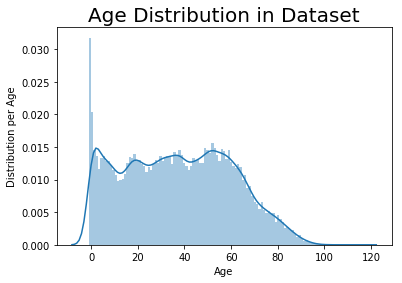

In [9]:
#As the age column looks strange as there is a value below "0" I will have a closer look at the column Age
ax = sns.distplot(df_appointments.Age,bins=115)
ax.set(xlabel='Age', ylabel='Distribution per Age')
plt.title("Age Distribution in Dataset", size=20)
plt.show()


In [10]:
# visible that there is some unrealistic ages as I am not expecting unborns, furthermore the value for babies age 0, 1 and 2 looks like it could misslead the analysis 
# looking at this all ages below 2 will be removed later

#### Data Cleaning

In [11]:
#Drop PatientId and AppointmentID as those columns are not necessary
df_appointments.drop(['PatientId','AppointmentID'],axis=1, inplace = True)

In [12]:
# keep only data with age above or equal to 0 
df_appointments = df_appointments[df_appointments['Age'] >= 2]

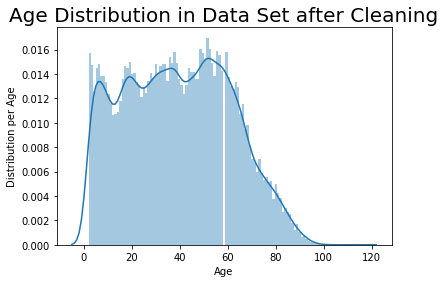

In [13]:
# confirm if ages below 1 have been dropped
ax=sns.distplot(df_appointments.Age,bins=115)
ax.set(xlabel='Age', ylabel='Distribution per Age')
plt.title("Age Distribution in Data Set after Cleaning", size=20)

plt.show()

In [14]:
#Change 'No show' values in integers in order to ease further analysis
#0 = dismissed appointments, 1= attended appointments
df_appointments['No-show'] = df_appointments['No-show'].map({'Yes': 0, 'No': 1})


In [15]:
#Change 'Gender' values in integers in order to ease further analysis as will work with count() and sum()
# 0 = Women, 1 = men
df_appointments['Gender'] = df_appointments['Gender'].map({'F': 0, 'M': 1})

In [16]:
#Check of changes in No show and Gender
df_appointments.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [17]:
# rename "No-show" to "No_show" in order to ease data analyis
df_appointments.rename(columns={'No-show':'No_show'},inplace = True)


In [18]:
#Check renaming "No-show" to "No_show"
df_appointments.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [19]:
# Create a data set for attended and dismissed appointments
attended = df_appointments.No_show == True
dismissed = df_appointments.No_show == False

In [20]:
#Distribute Timestamp Scheduled Day in Day and Time
df_appointments['ScheduledDay1'] = pd.to_datetime(df_appointments['ScheduledDay']).dt.date
df_appointments['ScheduledDay2'] = pd.to_datetime(df_appointments['ScheduledDay']).dt.time

In [21]:
#Distribute Timestamp Appointment Day in Day and Time
df_appointments['AppointmentDay1'] = pd.to_datetime(df_appointments['AppointmentDay']).dt.date
df_appointments['AppointmentDay2'] = pd.to_datetime(df_appointments['AppointmentDay']).dt.time

In [22]:
# Create Delta between Scheduled Date and Appointment Date
df_appointments['Delta'] = df_appointments['ScheduledDay1'] - df_appointments['AppointmentDay1']

In [23]:
df_appointments['Delta'] = df_appointments['Delta'].dt.days

In [24]:
# Check if Delta column is working
df_appointments.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDay1,ScheduledDay2,AppointmentDay1,AppointmentDay2,Delta
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23,2016-04-29,00:00:00,0


In [25]:
#For Handicap there is not only 1 or 0 in the data of handcap
df_appointments.Handcap.unique()

array([0, 1, 2, 3, 4])

In [26]:
# That is why I am looking at the distribution over these categories
df_appointments.groupby('Handcap').count()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No_show,ScheduledDay1,ScheduledDay2,AppointmentDay1,AppointmentDay2,Delta
Handcap,,,,,,,,,,,,,,,,
0,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475,102475
1,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040,2040
2,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [27]:
# As the overall numbers are pretty low I will change them to 1 in order to ease the later analysis
df_appointments.Handcap.replace([0,1,2,3,4], [0,1,1,1,1], inplace=True)

In [28]:
# Check Handicaps
df_appointments.Handcap.unique()

array([0, 1])

<a id='eda'></a>
## Exploratory Data Analysis



#### 1. What is the overall rate of attendance?

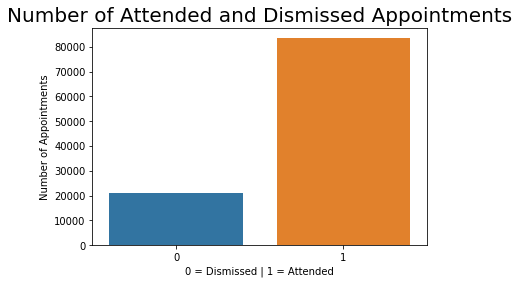

In [29]:
#Overall attended and dismissed appointments
ax =sns.countplot(x='No_show',data=df_appointments)
ax.set(xlabel='0 = Dismissed | 1 = Attended', ylabel='Number of Appointments')
plt.title("Number of Attended and Dismissed Appointments", size=20)
plt.show()

In [30]:
# Average attendance
average_attendace = df_appointments[attended].No_show.count()/df_appointments.No_show.count()
average_attendace

0.796923047539011

In [31]:
# Outcome: Average Attendance = 79.7%

#### 2. Are there specific indicators which make the attendance more likeable or less likeable? 

In [32]:
#Percentage of categories and appointments
df_appointments.mean()

Gender           0.340776
Age             39.126096
Scholarship      0.102441
Hipertension     0.208196
Diabetes         0.075845
Alcoholism       0.032087
Handcap          0.021382
SMS_received     0.324875
No_show          0.796923
Delta          -10.198770
dtype: float64

In [33]:
#Percentage of categories and attended appointments
df_appointments[attended].mean()

Gender           0.341430
Age             39.922935
Scholarship      0.097880
Hipertension     0.216048
Diabetes         0.078048
Alcoholism       0.032151
Handcap          0.021954
SMS_received     0.295294
No_show          1.000000
Delta           -8.790914
dtype: float64

In [34]:
#Percentage of categories and attended appointments
df_appointments[dismissed].mean()

Gender           0.338208
Age             35.999107
Scholarship      0.120339
Hipertension     0.177381
Diabetes         0.067200
Alcoholism       0.031836
Handcap          0.019139
SMS_received     0.440959
No_show          0.000000
Delta          -15.723536
dtype: float64

In [35]:
# From this first rough overview of the means the following is already recognizebale: 
#1 Gender - nearly the same
#2 Age - Younger people tend to miss an appointment more oftenDiabetes - nearly the same
#3 Scholarships - small impact - likelyhood of dismissed slighly higher with a scholarship
#4 Hipertension-  small impact - likelyhood of dismissed slighly lower with a Hipertension
#5 Diabetes - small impact
#6 Alcoholism - nearly the same
#7 Handcap - nearly the same
#8 SMS - with impact - likelyhood of dismissed higher with SMS 
#9 Delta - with no expressiveness

In [36]:
# After looking at the means I will check the correlation in order to validate it
df_appointments.corr().loc['No_show',:]

Gender          0.002735
Age             0.071691
Scholarship    -0.029795
Hipertension    0.038312
Diabetes        0.016484
Alcoholism      0.000719
Handcap         0.007826
SMS_received   -0.125125
No_show         1.000000
Delta           0.182586
Name: No_show, dtype: float64

Text(0.5,1,'Correlation between Attendance and other Categories')

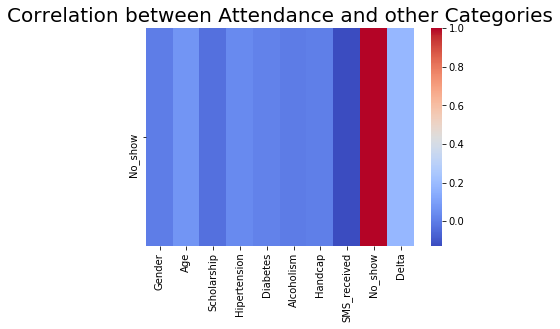

In [37]:
# create a diagram that shows the correlation between the diffrent categories
sns.heatmap(df_appointments.corr().loc[['No_show'],:],cmap ='coolwarm')
plt.title("Correlation between Attendance and other Categories", size=20)


In [38]:
# The findings from the mean analysis are confirmed
#1 Gender - low correlation
#2 Age - correlation higher then other factors  -> important factor 
#3 Scholarships - low correlation
#4 Hipertension-  low correlation
#5 Diabetes - low correlation
#6 Alcoholism -  low correlation
#7 Handcap - low correlation
#8 SMS - relativly high negative correlation -> important factor
#9 Delta - highest correlation -> important factor

#### 3. Which Gender is more likely to attend to an appointment and how is this influenced by the different categories?

In [39]:
#percentage of men attended
percentage_of_men_attended = df_appointments[attended].Gender.sum()/df_appointments.Gender.sum()
percentage_of_men_attended

0.79845308821880956

In [40]:
#percentage of women attended
percentage_of_women_attended = (df_appointments[attended].Gender.count()- df_appointments[attended].Gender.sum())/(df_appointments.Gender.count()-df_appointments.Gender.sum())
percentage_of_women_attended

0.79613211647109949

In [41]:
# Percentages validate previous findings and show the the gender is not an important factor
# But in the following I will check if mabye the different categories are different among men and women

In [42]:
# Show percentages of attended appointments of each gender by category 
(df_appointments[attended].groupby('Gender').sum()/df_appointments.groupby('Gender').sum())

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Delta
Gender,,,,,,,,,
0,0.811121,0.761461,0.826781,0.818587,0.748160,0.811335,0.722222,1.0,0.690616
1,0.817505,0.761364,0.827453,0.823630,0.827328,0.827550,0.729129,1.0,0.679028


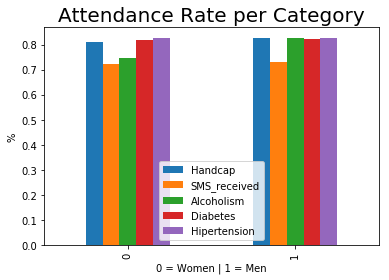

In [43]:
# Show previous results as graph
ax= (df_appointments[attended].groupby('Gender').sum()/df_appointments.groupby('Gender').sum()).plot(y=['Handcap','SMS_received','Alcoholism','Diabetes','Hipertension'],kind='bar')
ax.set(xlabel='0 = Women | 1 = Men', ylabel='%')
plt.title("Attendance Rate per Category", size=20)
plt.show()

In [44]:
# Outcome
# it shows that for the categories Scholarship, Hipertension, Diabetes, Handcap, SMS_received the gender does not matter
# but for alcoholism it shows a difference - men with alcoholism tend to miss more appointments as women with alcoholism
# people with Hipertension, Diabetes, Handcap do have a higher chance of attending the appointments as the mean 
# people with a scholarship or received a SMS tend to have a lower chance of attending as the average
# for age and delta this kind of analysis is not apllicable as not only 0 and 1 in data set

#### 4. Which impact do has the age? 

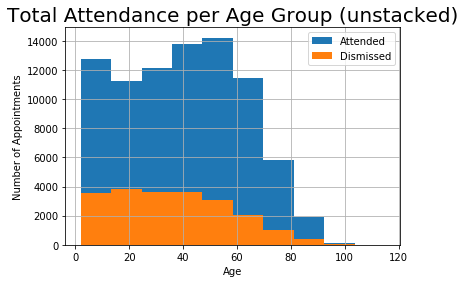

In [45]:
# Checking overall distribution of age in regards to attendance
df_appointments[attended].Age.hist(label = 'Attended')
df_appointments[dismissed].Age.hist(label = 'Dismissed')
plt.title("Total Attendance per Age Group (unstacked)", size=20)
plt.xlabel("Age")
plt.ylabel("Number of Appointments")
plt.legend()

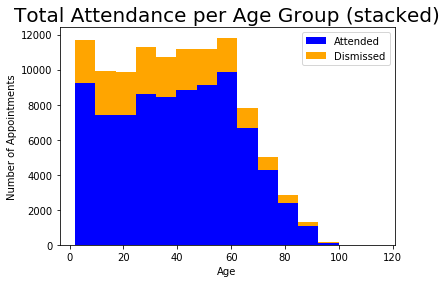

In [46]:
# Create better visualisation of overall distribution of age in regards to attendance
plt.hist([df_appointments[attended].Age,df_appointments[dismissed].Age],stacked=True, bins = 15, color = ['b','orange'])
plt.title("Total Attendance per Age Group (stacked)", size=20)
plt.xlabel("Age")
plt.ylabel("Number of Appointments")
plt.legend(['Attended', 'Dismissed'])

In [47]:
# The previous 2 visualisations show that in regards to the age
# It shows that there are difference through the different ages what was already validated by the correlation analysis 
# But this kind of graph do not allow precise conclusions - a graph that is showing percentages can do this better

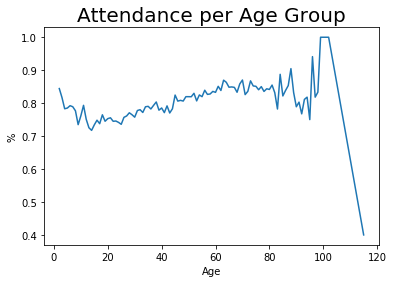

In [49]:
# Check percentages of attended appointments by age
df_age = df_appointments[attended].groupby('Age').count()/df_appointments.groupby('Age').count()
plt.title("Attendance per Age Group", size=20)
plt.xlabel("Age")
plt.ylabel("%")
df_age.No_show.plot()

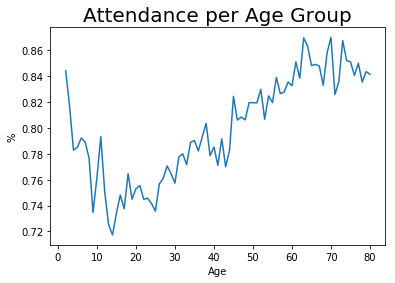

In [50]:
# Check percentages of attended appointments 
# data of the above 80 years excluded as very few data which is missleading overall picture

df_appointments_below = df_appointments[df_appointments['Age'] <= 80]
df_appointments_att_below = df_appointments[attended][df_appointments[attended]['Age'] <= 80]

df_age = df_appointments_att_below.groupby('Age').count()/df_appointments_below.groupby('Age').count()
plt.title("Attendance per Age Group", size=20)
plt.xlabel("Age")
plt.ylabel("%")
df_age.No_show.plot()

In [51]:
# Outcome 
# The attendace in the age group around the 20s is the lowest (except 115 year old people - but this number is not useful as there are only 2)
# The older the people get the higher is the attendance rate (at least until 80 - after 80 there is to less data)

#### 5. How do days between scheduling day and appointment day have an impact?

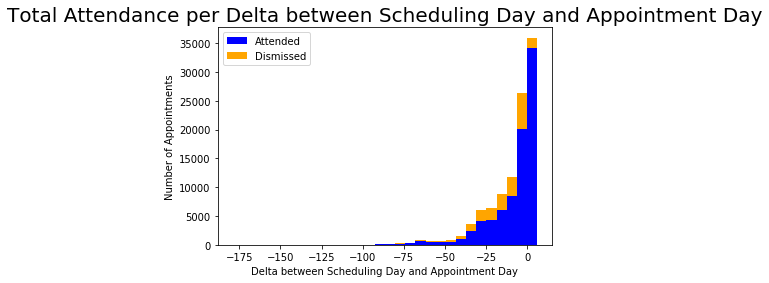

In [52]:
# Create better visualisation of overall distribution of Delta in regards to attendance
plt.hist([df_appointments[attended].Delta,df_appointments[dismissed].Delta],stacked=True, bins = 30, color = ['b','orange'])
plt.title("Total Attendance per Delta between Scheduling Day and Appointment Day", size=20)
plt.xlabel("Delta between Scheduling Day and Appointment Day")
plt.ylabel("Number of Appointments")
plt.legend(['Attended', 'Dismissed'])

In [53]:
# As with the age distribution the the distribution over the attendance in regards to the delta is hard to interpret with counts
# In order to have a better picture the percentage is needed 

Text(0,0.5,'%')

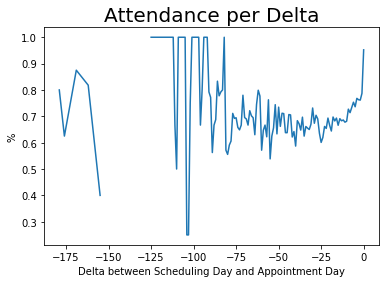

In [54]:
# Check percentages of attended appointments by delta
df_delta = df_appointments[attended].groupby('Delta').count()/df_appointments.groupby('Delta').count()
df_delta.No_show.plot()
plt.title("Attendance per Delta", size=20)
plt.xlabel("Delta between Scheduling Day and Appointment Day")
plt.ylabel("%")

Text(0,0.5,'%')

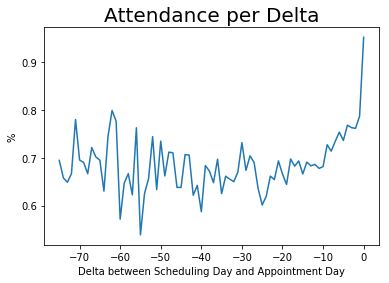

In [55]:
# data of the above 75 days excluded as very few data which is missleading overall picture

df_appointments_resched1 = df_appointments[df_appointments['Delta'] >= -75]
df_appointments_resched2 = df_appointments[attended][df_appointments[attended]['Delta'] >= -75]

df_delta = df_appointments_resched2.groupby('Delta').count()/df_appointments_resched1.groupby('Delta').count()
df_delta.No_show.plot()
plt.title("Attendance per Delta", size=20)
plt.xlabel("Delta between Scheduling Day and Appointment Day")
plt.ylabel("%")

In [56]:
# Outcome 
# As only very little data is available for big diffences between scheduled day and apppoint day are available this delta > 75 day are not meaningful at all 
# But what is very good recognizeable as the delta gets smaller the attendance is increasing 
# That means a big delta between schedule day and appointment day increases the percentage of missing the appointment

<a id='conclusions'></a>
## Conclusions

### Outcome of questions from the beginning 

In the following I will shortly describe the findings of my analysis specifically in regards to the questions which I raised in the beginning 

- 1. What is the overall rate of attendance?
- 2. Are there specific indicators which make the attendance more likeable or less likeable? 
- 3. Which Gender is more likely to attend to an appointment and how is this influenced by the different categories?
- 4. Which impact do has the age? 
- 5. How do days between scheduling day and appointment day have an impact?


##### 1. What is the overall rate of attendance?

Outcome: The overall rate of attendance is 79.7%.

Limits: All appointments below age 2 were excluded as portion has a big proportation but nearly no epressiveness in regards to categoies.

##### 2. Are there specific indicators which make the attendance more likeable or less likeable? 

Outcome: Yes, diffenrent indicators do have an impact on the attendance rate. Within this analysis the following factors have been analyzed closer: 
1. Gender - do has no impact - attendance rate with women and men nearly identical, but in regards to different categories there are differences which will explained in question 3
2. Age - Age do has an impact - will be clarified in question 4
3. Scholarships - overall impact very low 
4. Hipertension -  overall impact very low
5. Diabetes - overall impact very low
6. Alcoholism -  overall impact very low
7. Handcap - overall impact very low
8. SMS - do has an impact - people who received a SMS seems to miss more appointments
9. Delta - do has an impact - will be explained in detail in question 5 

Limits: Categories were checked each by each and not in relation to each other. This means that overall diabetes seems to have no big impact but it could be that a specific group wihtin the diabetes people tend to attend more often then other groups and the other way round. In order to have better picture on this, question 3 shows excatly this in regards to gender. In this question you can see that one group tend in one category to more missed appointments. 
Moreover the category Handcap was simplified as it was not considered to which grade a person has a handcap. It was only considered if there is a handcap or not.

##### 3. Which Gender is more likely to attend to an appointment and how is this influenced by the different categories?

Outcome: The analysis makes clear that the overall attendance rate between women and men is nearly the same. But a closer look at the categories Scholarship, Hipertension, Diabetes, Handcap, SMS and alcoholism shows that the gender do matter for one of these categories: Alcoholism.
Women with alcoholism tend to miss more appointments as men with alcoholism. Women tend to attend with a percentage of 75% while men with a percentage 83%.



##### 4. Which impact do has the age? 

The analysis shows that there are differences in the different ages. It shows that the attendance within little kids is the high but it is dropping until teenager age of about 15 in which the attendance rate is the lowest across all age groups. Then it increasing again and it hits the high in the ages between 60 and 80. 

Limits: All appointments below Age 2 were excluded as portion has a big proportation but nearly no epressiveness in regards to categoies.After the age of 80 there is not much data anymore and there are some runaways. That is why it is not included in the conclusion.

##### 5. How do days between scheduling day and appointment day have an impact?

It is recognizeable that as the delta gets smaller the attendance rate is increasing significantly. That means a big delta between schedule day and appointment day increases the percentage of dismissed appointments.

Limits:As only very little data is available for big diffences between scheduled day and apppoint day are available for delta > 75 days these values were excluded for the conclusion. 

## Submit Project 

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0